<a href="https://colab.research.google.com/github/jej0312/DM_TA/blob/main/5_SNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Social Network Analysis (SNA; 사회적 연결망 분석)
- TA: 전은지 (Eunji Jeon)  
- Dept. of Industrial Engineering, Yonsei Univ (Industrial Statistics Lab; ISL 산업통계연구실)
- 문의: `jej_0312_@naver.com`

- structure: node(vertex; entity), edge(link; relation; predicate), attribute
- input data: edgelist/adjacency matrix
- network 종류
  - directed v.s. undirected: 방향성의 여부
  - weighted v.s. unweighted: edge의 weight
  - multi-relational: relation type의 개수 (`nx.MultiGraph()`, `nx.MultiDiGraph()`)
  - bipartite graph (이분 그래프): 정점을 2그룹으로 나눌 수 있으되 같은 그룹의 정점끼리는 간선으로 이어지지 않은 경우
    - 학생 - 수업: 학생들이 어떤 수업을 듣고 있는지
    - 유저 - 선호 영화: 각 유저가 어떠한 영화를 선호하는지
    - 구직자 - 선호 회사: 각 구직자가 어떠한 회사를 선호하는지

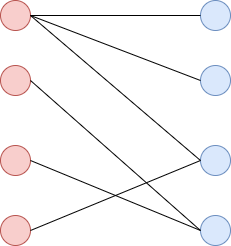

- Software: [Gephi](https://gephi.org/), [Ucinet](https://sites.google.com/site/ucinetsoftware/home), R (igraph), Python (networkx), nodeXL

# Step 1. Graph
- `networkx`를 통해 다양한 유형의 네트워크를 생성할 수 있음
  - `nx.Graph()`: undirected graph
  - `nx.DiGraph()`: directed graph

## 1) From Scratch (Edgelist)

In [1]:
Fruits = ['apple', 'banana', 'kiwi', 'mango']
relations = [('apple', 'banana'), ('kiwi', 'apple'), ('mango', 'apple'), ('mango', 'banana')]

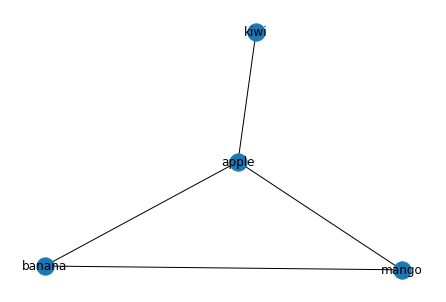

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Graph 생성
G = nx.Graph()

# Node (vertex) 생성
G.add_nodes_from(Fruits)

# Edge (link) 생성
G.add_edges_from(relations)  # graph에 속한 모든 node들이 edgelist에 포함된 경우 add_nodes_from() 과정을 생략할 수 있음

nx.draw(G, with_labels=True)
plt.show()

In [3]:
print('Nodes:', G.nodes)
print('Number of nodes:', nx.number_of_nodes(G))
print('Edges:', G.edges)
print('Number of nodes:', nx.number_of_edges(G))

Nodes: ['apple', 'banana', 'kiwi', 'mango']
Number of nodes: 4
Edges: [('apple', 'banana'), ('apple', 'kiwi'), ('apple', 'mango'), ('banana', 'mango')]
Number of nodes: 4


In [4]:
print(nx.info(G))

Graph with 4 nodes and 4 edges


- degree: node와 연결된 모든 edge의 수

In [5]:
degree = nx.degree(G)
print(degree)

[('apple', 3), ('banana', 2), ('kiwi', 1), ('mango', 2)]


In [6]:
print(list(G.neighbors('banana')))

['apple', 'mango']


- Directed graph의 경우 다음과 같이 생성 가능

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# 방향이 있는 네트워크 생성
G_directed = nx.DiGraph()

G_directed.add_nodes_from(Fruits)
G_directed.add_edges_from(relations)

In [8]:
in_degree = G_directed.in_degree()
out_degree = G_directed.out_degree()
print('in-degree:', in_degree)
print('out-degree:', out_degree)

in-degree: [('apple', 2), ('banana', 2), ('kiwi', 0), ('mango', 0)]
out-degree: [('apple', 1), ('banana', 0), ('kiwi', 1), ('mango', 2)]


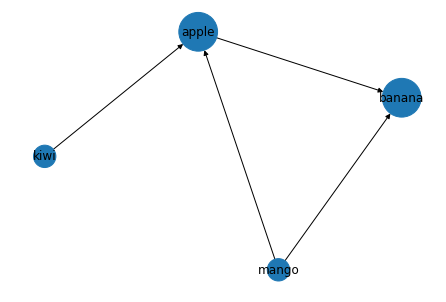

In [9]:
# 시각화 (degree가 클수록 원의 크기도 크도록)
nx.draw(G_directed, node_size=[500 + v[1]*500 for v in in_degree], with_labels=True)

## 2) From Scratch (Adjacency matrix)

In [10]:
# Adjacency matrix
A = nx.to_numpy_matrix(G)
print(A)

[[0. 1. 1. 1.]
 [1. 0. 0. 1.]
 [1. 0. 0. 0.]
 [1. 1. 0. 0.]]


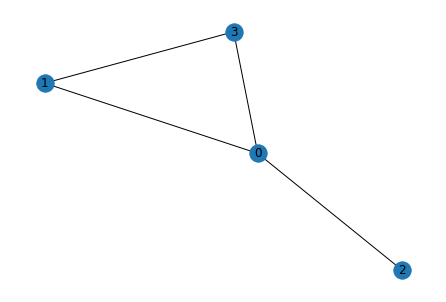

{0: 'apple', 1: 'banana', 2: 'kiwi', 3: 'mango'}


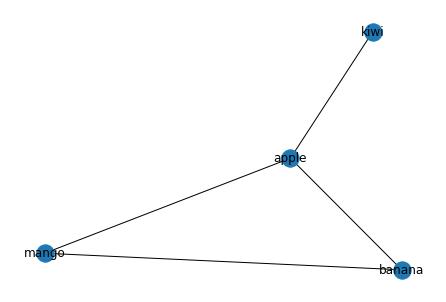

In [11]:
G_Adjacency=nx.from_numpy_matrix(A) # node label이 지정되지 않은 상태 (0, 1, 2, ...)
nx.draw(G_Adjacency, with_labels=True)
plt.show()

mapping = {i: f for i, f in enumerate(Fruits)}
print(mapping) # 변경할 label 형태

H = nx.relabel_nodes(G_Adjacency, mapping)
nx.draw(H, with_labels=True)
plt.show()

## 3) From Dataset

In [12]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
import pandas as pd 
data = pd.read_csv('https://raw.githubusercontent.com/jej0312/DM_TA/main/data/asoiaf-all-edges.csv')

In [14]:
data # undirected, weighted, edgelist

,Source,Target,Type,id,weight
0,Addam-Marbrand,Brynden-Tully,Undirected,0,3
1,Addam-Marbrand,Cersei-Lannister,Undirected,1,3
2,Addam-Marbrand,Gyles-Rosby,Undirected,2,3
3,Addam-Marbrand,Jaime-Lannister,Undirected,3,14
4,Addam-Marbrand,Jalabhar-Xho,Undirected,4,3
...,...,...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,Undirected,2818,4
2819,Waymar-Royce,Will-(prologue),Undirected,2819,18
2820,Weasel,Weese,Undirected,2820,6
2821,Woth,Yoren,Undirected,2821,4


In [15]:
df = data[['Source', 'Target', 'weight']]
df.drop_duplicates(subset=['Source', 'Target', 'weight'], inplace=True) # 중복 제거

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
df

,Source,Target,weight
0,Addam-Marbrand,Brynden-Tully,3
1,Addam-Marbrand,Cersei-Lannister,3
2,Addam-Marbrand,Gyles-Rosby,3
3,Addam-Marbrand,Jaime-Lannister,14
4,Addam-Marbrand,Jalabhar-Xho,3
...,...,...,...
2818,Walder-Frey-(son-of-Merrett),Wex-Pyke,4
2819,Waymar-Royce,Will-(prologue),18
2820,Weasel,Weese,6
2821,Woth,Yoren,4


In [17]:
'''
https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

source = A valid column name (string or integer) for the source nodes (for the directed case)
target = A valid column name (string or integer) for the target nodes (for the directed case)
* directed인 경우 source -> target, undirected인 경우 source와 target의 source - target

edge_attr = A valid column name (str or int) or iterable of column names that are used to retrieve items and add them to the graph as edge attributes.
            If True, all of the remaining columns will be added. If None, no edge attributes are added to the graph.
'''

G_data = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')

# # directed graph의 경우 create_using=nx.DiGraph() 설정
# G = nx.from_pandas_edgelist(df,  source='Source', target='Target', edge_attr='weight', create_using=nx.DiGraph())

- Node: 왕좌의 게임의 인물
- Edge: 인물들 간의 친밀도

In [18]:
print(nx.info(G_data))

Graph with 796 nodes and 2823 edges


In [19]:
G_data.nodes

NodeView(('Addam-Marbrand', 'Brynden-Tully', 'Cersei-Lannister', 'Gyles-Rosby', 'Jaime-Lannister', 'Jalabhar-Xho', 'Joffrey-Baratheon', 'Kevan-Lannister', 'Lyle-Crakehall', 'Oberyn-Martell', 'Tyrion-Lannister', 'Tywin-Lannister', 'Varys', 'Aegon-Frey-(son-of-Stevron)', 'Catelyn-Stark', 'Robb-Stark', 'Stevron-Frey', 'Walder-Frey', 'Aegon-I-Targaryen', 'Daenerys-Targaryen', 'Eddard-Stark', 'Harren-Hoare', 'Nan', 'Rhaenys-Targaryen', 'Stannis-Baratheon', 'Torrhen-Stark', 'Visenya-Targaryen', 'Aegon-Targaryen-(son-of-Rhaegar)', 'Elia-Martell', 'Franklyn-Flowers', 'Haldon', 'Harry-Strickland', 'Jon-Connington', 'Lemore', 'Rhaegar-Targaryen', 'Rhaenys-Targaryen-(daughter-of-Rhaegar)', 'Rolly-Duckfield', 'Viserys-Targaryen', 'Yandry', 'Ysilla', 'Aegon-V-Targaryen', 'Aemon-Targaryen-(Maester-Aemon)', 'Aemon-Targaryen-(Dragonknight)', 'Alleras', 'Alliser-Thorne', 'Bowen-Marsh', 'Chett', 'Clydas', 'Cotter-Pyke', 'Daeron-II-Targaryen', 'Dareon', 'Denys-Mallister', 'Donal-Noye', 'Eddison-Tollett',

In [20]:
G_data.edges

EdgeView([('Addam-Marbrand', 'Brynden-Tully'), ('Addam-Marbrand', 'Cersei-Lannister'), ('Addam-Marbrand', 'Gyles-Rosby'), ('Addam-Marbrand', 'Jaime-Lannister'), ('Addam-Marbrand', 'Jalabhar-Xho'), ('Addam-Marbrand', 'Joffrey-Baratheon'), ('Addam-Marbrand', 'Kevan-Lannister'), ('Addam-Marbrand', 'Lyle-Crakehall'), ('Addam-Marbrand', 'Oberyn-Martell'), ('Addam-Marbrand', 'Tyrion-Lannister'), ('Addam-Marbrand', 'Tywin-Lannister'), ('Addam-Marbrand', 'Varys'), ('Brynden-Tully', 'Arya-Stark'), ('Brynden-Tully', 'Catelyn-Stark'), ('Brynden-Tully', 'Daven-Lannister'), ('Brynden-Tully', 'Edmure-Tully'), ('Brynden-Tully', 'Edwyn-Frey'), ('Brynden-Tully', 'Emmon-Frey'), ('Brynden-Tully', 'Hoster-Tully'), ('Brynden-Tully', 'Jaime-Lannister'), ('Brynden-Tully', 'Lyle-Crakehall'), ('Brynden-Tully', 'Lysa-Arryn'), ('Brynden-Tully', 'Nestor-Royce'), ('Brynden-Tully', 'Rickard-Karstark'), ('Brynden-Tully', 'Robb-Stark'), ('Brynden-Tully', 'Ryman-Frey'), ('Brynden-Tully', 'Theon-Greyjoy'), ('Brynden-Tu

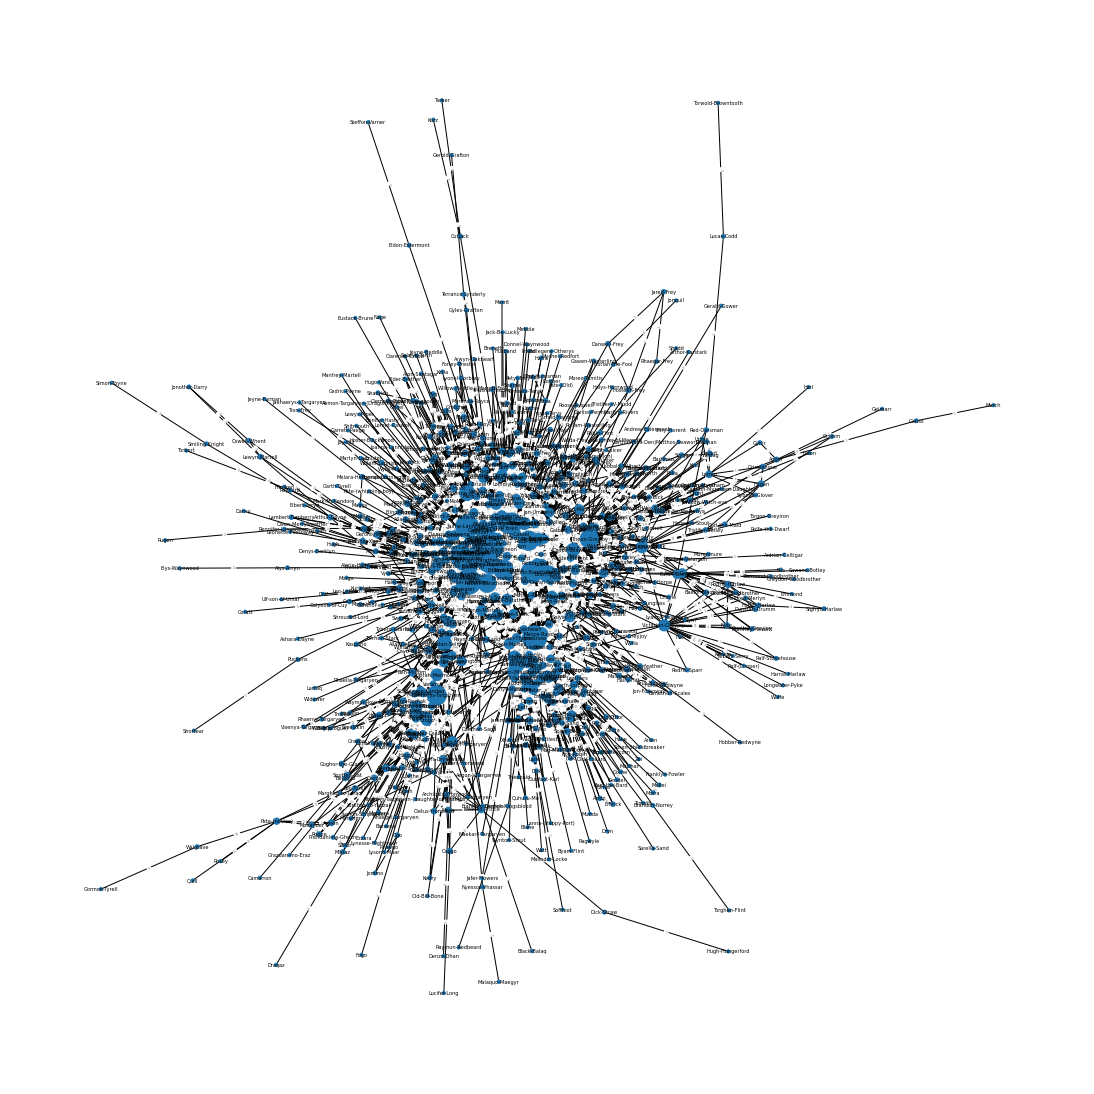

In [21]:
plt.figure(figsize=(15, 15))

degree = nx.degree(G_data)
pos=nx.spring_layout(G_data)
nx.draw(G_data, pos, with_labels=True, node_size=[5 + v[1]*5 for v in degree], font_size = 5) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html
edge_weight = nx.get_edge_attributes(G_data, 'weight')
nx.draw_networkx_edge_labels(G_data, pos, edge_labels = edge_weight, alpha=0.6, font_size=3) # https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edge_labels.html
plt.show()

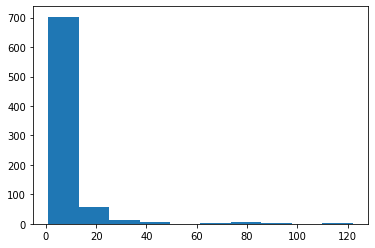

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.hist(dict(degree).values())
plt.show()

# Step 2. Attribute

## 1) Edge attribute (weight)

In [23]:
import networkx as nx
import matplotlib.pyplot as plt

G_weighted = nx.Graph()
G_weighted.add_nodes_from(Fruits)

In [24]:
# Case 1
weighted_relations = [('apple', 'banana', {'weight': 7}), ('kiwi', 'apple', {'weight': 4}), ('mango', 'apple', {'weight': 3}), ('mango', 'banana', {'weight': 5})]
G_weighted.add_edges_from(weighted_relations)
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 7}), ('apple', 'kiwi', {'weight': 4}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 5})]


In [25]:
# Case 2
G_weighted['apple']['banana']['weight']=5
G_weighted['apple']['kiwi']['weight']=2
G_weighted['apple']['mango']['weight']=3
G_weighted['banana']['mango']['weight']=4
print(G_weighted.edges(data=True))

[('apple', 'banana', {'weight': 5}), ('apple', 'kiwi', {'weight': 2}), ('apple', 'mango', {'weight': 3}), ('banana', 'mango', {'weight': 4})]


In [26]:
nx.to_numpy_matrix(G_weighted)

matrix([[0., 5., 2., 3.],
        [5., 0., 0., 4.],
        [2., 0., 0., 0.],
        [3., 4., 0., 0.]])

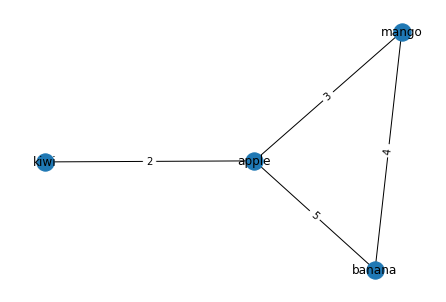

In [27]:
labels = nx.get_edge_attributes(G_weighted, 'weight')

pos = nx.spring_layout(G_weighted)
nx.draw(G_weighted, pos, with_labels=True)
nx.draw_networkx_edge_labels(G_weighted, pos, edge_labels=labels)

plt.show()

In [28]:
print('전체 shortest path:\n',nx.shortest_path(G))
print('banana to kiwi:',nx.shortest_path(G, 'banana', 'kiwi'))
# print('banana to kiwi:',nx.shortest_path(G_weighted, 'banana', 'kiwi', weight='weight')) # 여러 route가 있을 때 weight을 고려하여 shortest path 계산

전체 shortest path:
 {'apple': {'apple': ['apple'], 'banana': ['apple', 'banana'], 'kiwi': ['apple', 'kiwi'], 'mango': ['apple', 'mango']}, 'banana': {'banana': ['banana'], 'apple': ['banana', 'apple'], 'mango': ['banana', 'mango'], 'kiwi': ['banana', 'apple', 'kiwi']}, 'kiwi': {'kiwi': ['kiwi'], 'apple': ['kiwi', 'apple'], 'banana': ['kiwi', 'apple', 'banana'], 'mango': ['kiwi', 'apple', 'mango']}, 'mango': {'mango': ['mango'], 'apple': ['mango', 'apple'], 'banana': ['mango', 'banana'], 'kiwi': ['mango', 'apple', 'kiwi']}}
banana to kiwi: ['banana', 'apple', 'kiwi']


## 2) Node attribute

In [29]:
print('Attribute 부여하기 전:', G.nodes['kiwi'])

G.nodes['kiwi']['kind'] = 'fruit'
print('Attribute 부여한 후:', G.nodes['kiwi'])

print(G.nodes(data=True))

Attribute 부여하기 전: {}
Attribute 부여한 후: {'kind': 'fruit'}
[('apple', {}), ('banana', {}), ('kiwi', {'kind': 'fruit'}), ('mango', {})]


In [30]:
G.add_nodes_from(Fruits, kind='fruit') # kind라는 attribute에 fruit 값 추가
print(G.nodes(data=True))

[('apple', {'kind': 'fruit'}), ('banana', {'kind': 'fruit'}), ('kiwi', {'kind': 'fruit'}), ('mango', {'kind': 'fruit'})]


# Step 3. Social Network Analysis

## 1) Structure
- diameter: 네트워크에서 가장 멀리 연결된 pair의 거리
  - 모든 노드 쌍에 대해 Shortest Path를 계산 후, 그 중 가장 큰 값을 가지는 Path의 길이
- density: 모든 edge의 개수와 실제 edge 수(k)의 비
  - undirected: $k/n(n-1)/2$
  - directed: $k/n(n-1)$
- reciprocity: 주고 받는 비율 (i.e., A가 B를 친구로 지명하였을 때, B가 A를 친구로 지명) 
  - directed graph에서만 의미가 있음
- transitivity: 3 이상의 관계에서 연결된 비율 (i.e., A가 B를 친구로 지명하고, B는 C를 친구로 지명했을 때, A가 C를 친구로 지명)


In [31]:
print('diamter:', nx.diameter(G_data))
print('density:', nx.density(G_data))
print('transitivity:', nx.transitivity(G_data))
print('reciprocity:', nx.reciprocity(G_data))

diamter: 9
density: 0.008921968332227173
transitivity: 0.2090366938564282
reciprocity: 0.0


- directed graph의 경우

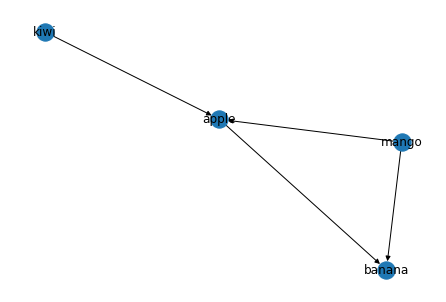

In [32]:
nx.draw(G_directed, with_labels=True)

In [33]:
'''
directed graph에서는 이동에 있어서 양방향을 모두 따지기 때문에 그냥 nx.diameter(G)를 할 경우 다음과 같은 오류 발생

NetworkXError: Found infinite path length because the digraph is not strongly connected
'''

print('diamter:', nx.diameter(nx.to_undirected(G_directed)))
print('density:', nx.density(nx.to_undirected(G_directed)))
print('transitivity:', nx.transitivity(G_directed))
print('reciprocity:', nx.reciprocity(G_directed))

diamter: 2
density: 0.6666666666666666
transitivity: 0.5
reciprocity: 0.0


## 2) Centrality
- Degree centrality (연결 중심성): 마당발이 누구인가? 누가 직접적 이웃이 가장 많은가?
  - Normalized degree centrality: 표준화를 위해 전체를 N-1로 나눠줌
- Betweenness centrality (매개 중심성): 얼마나 많은 최단 경로가 특정 노드를 지나는가?
  - Broker 역할을 하는 node를 찾을 수 있음
  - $C_B(i)=\sum_{j<k}g_{jk}(i)/g_{jk}$ where $g_{jk}$: jk를 연결하는 geodesics 수, 그 중 $g_{jk}(i)$: node i가 포함되어있는 경우
  - Normalized betweeness centrality: $C_B^*(i)=\frac{C_B(i)}{\frac{(N-1)(N-2)}{2}}$
- Closeness centrality (근접 중심성): 누가 다른 노드들에 대한 최단거리를 가지는가? (다른 노드들에 가장 빨리 정보를 확산시킬 수 있는가?)
  - 모든 다른 노드들과의 거리가 가장 가까운 노드가 중요한 노드
  - $C_C(i)=[\sum_{j=1}^{N-1}d(i,j)]^{-1}$
  - Normalized closness centrality: $C_C^*(i)=(N-1)C_C(i)$
- Eigenvector centrality (Bonacich power centrality): 누가 중요한 노드들과 연결이 많이 되어 있는가? 
  - 연결된 이웃의 중요도에 가중치를 부여
  - $C_E(v_i) \propto\sum_{v_j \in N_i}A_{ij}C_E(v_j)$, $A\mathbf{x}=\lambda \mathbf{x}$

- [참고](https://chaelist.github.io/docs/network_analysis/network_basics/#neighbors--degree)
- 이 외에 Katz centrality, PageRank [참고](https://bab2min.tistory.com/554)


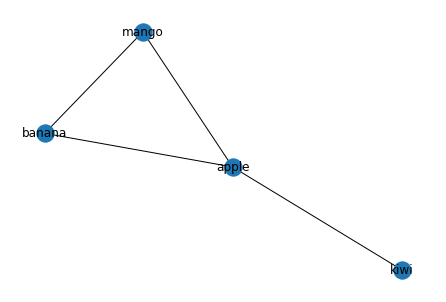

In [186]:
nx.draw(G, with_labels=True)

In [185]:
print('degree centrality:\n', nx.degree_centrality(G))
print('betweenness centrality:\n', nx.betweenness_centrality(G))
print('closeness centrality:\n', nx.closeness_centrality(G))
print('eigenvector centrality:\n', nx.eigenvector_centrality(G))

degree centrality:
 {'apple': 1.0, 'banana': 0.6666666666666666, 'kiwi': 0.3333333333333333, 'mango': 0.6666666666666666}
betweenness centrality:
 {'apple': 0.6666666666666666, 'banana': 0.0, 'kiwi': 0.0, 'mango': 0.0}
closeness centrality:
 {'apple': 1.0, 'banana': 0.75, 'kiwi': 0.6, 'mango': 0.75}
eigenvector centrality:
 {'apple': 0.6116286437343044, 'banana': 0.5227204550943347, 'kiwi': 0.28184579793865716, 'mango': 0.5227204550943347}


- 앞서 불러온 데이터셋을 사용하여 이후 실습을 진행

In [189]:
deg_cen = nx.degree_centrality(G_data)
bet_cen = nx.betweenness_centrality(G_data)
clo_cen = nx.closeness_centrality(G_data)
eig_cen = nx.eigenvector_centrality(G_data)

In [190]:
# 각 centrality별 가장 값이 높은 3개의 node 추출
print('degree centrality:\n', sorted(deg_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('betweenness centrality:\n', sorted(bet_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('closeness centrality:\n', sorted(clo_cen.items(), key=lambda x:x[1], reverse=True)[0:3])
print('eigenvector centrality:\n', sorted(eig_cen.items(), key=lambda x:x[1], reverse=True)[0:3])

degree centrality:
 [('Tyrion-Lannister', 0.15345911949685534), ('Jon-Snow', 0.14339622641509434), ('Jaime-Lannister', 0.1270440251572327)]
betweenness centrality:
 [('Jon-Snow', 0.1921196196835449), ('Tyrion-Lannister', 0.1621910961115984), ('Daenerys-Targaryen', 0.11841801916269204)]
closeness centrality:
 [('Tyrion-Lannister', 0.4763331336129419), ('Robert-Baratheon', 0.4592720970537262), ('Eddard-Stark', 0.455848623853211)]
eigenvector centrality:
 [('Tyrion-Lannister', 0.25155836369082013), ('Cersei-Lannister', 0.2357712102434478), ('Jaime-Lannister', 0.2263385016604407)]


# Appendices

## Community Detection
- 연결 밀도가 높은 집단끼리 묶어서 분석
  - community: modularity가 높은 집단
  - [modularity]((https://mons1220.tistory.com/93)): 커뮤니티 내부에 펼쳐져 있는 링크들이 무작위적인 연결들과 비교했을 때 얼마나 더 많은지 정량화한 지표
- algorithm: [Louvain algorithm](https://lsjsj92.tistory.com/587)  
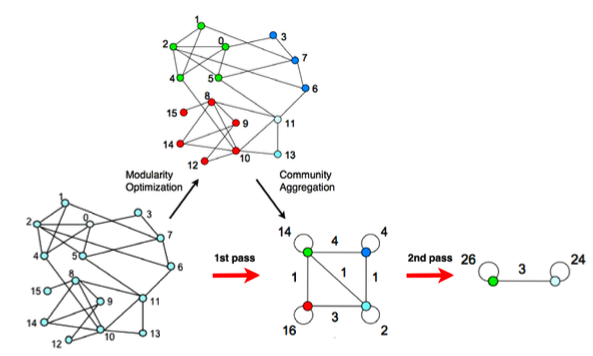
- 추가적인 [참고 코드](https://towardsdatascience.com/louvains-algorithm-for-community-detection-in-python-95ff7f675306)

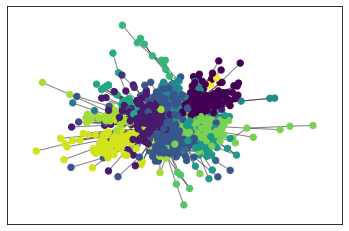

In [37]:
import community.community_louvain as cl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import networkx as nx

partition = cl.best_partition(G_data)

pos = nx.spring_layout(G_data)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_data, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G_data, pos, alpha=0.5)
plt.show()

## Link Prediction
- 노드 간 missing/latent link 예측
  - 구조적 유사성 지표를 통해 두 노드 간 유사한 정보를 기반으로 예측
- [indices](https://medium.com/neo4j/link-prediction-with-neo4j-part-1-an-introduction-713aa779fd9): Common Neighbors, Adamic Adar, Preferential Attachment, Katz 등 [networkx](https://networkx.org/documentation/stable/reference/algorithms/link_prediction.html)에서 일부 link prediction metrics 제공

In [42]:
common_neighbor = [(e[0], e[1], len(list(nx.common_neighbors(G_data, e[0], e[1])))) for e in nx.non_edges(G_data)]
common_neighbor.sort(key=lambda x: x[-1], reverse=True)
common_neighbor[:10]

[('Stannis-Baratheon', 'Arya-Stark', 20),
 ('Jaime-Lannister', 'Bran-Stark', 19),
 ('Brienne-of-Tarth', 'Eddard-Stark', 19),
 ('Petyr-Baelish', 'Brienne-of-Tarth', 18),
 ('Stannis-Baratheon', 'Bran-Stark', 18),
 ('Margaery-Tyrell', 'Stannis-Baratheon', 16),
 ('Catelyn-Stark', 'Tommen-Baratheon', 16),
 ('Petyr-Baelish', 'Jon-Snow', 16),
 ('Arya-Stark', 'Brienne-of-Tarth', 16),
 ('Arya-Stark', 'Loras-Tyrell', 16)]

In [53]:
'''
공통 이웃이 많은 경우 더 연결될 가능성이 높음
'''
common_neighbor = nx.common_neighbor_centrality(G_data)
common_neighbor = list(common_neighbor)
common_neighbor.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in common_neighbor[:10]:
    print(f"({u}, {v}) -> {p}")

(Stannis-Baratheon, Arya-Stark) -> 95.59999999999998
(Jaime-Lannister, Bran-Stark) -> 94.79999999999998
(Brienne-of-Tarth, Eddard-Stark) -> 94.79999999999998
(Petyr-Baelish, Brienne-of-Tarth) -> 93.99999999999999
(Stannis-Baratheon, Bran-Stark) -> 93.99999999999999
(Margaery-Tyrell, Stannis-Baratheon) -> 92.39999999999998
(Catelyn-Stark, Tommen-Baratheon) -> 92.39999999999998
(Petyr-Baelish, Jon-Snow) -> 92.39999999999998
(Arya-Stark, Brienne-of-Tarth) -> 92.39999999999998
(Arya-Stark, Loras-Tyrell) -> 92.39999999999998


In [54]:
'''
노드가 공통 이웃을 통해 다른 노드에 보낼 수 있는 정보를 기반으로 측정
'''
aa = nx.adamic_adar_index(G_data)
aa = list(aa)
aa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in aa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jaime-Lannister, Bran-Stark) -> 5.425753364906164
(Brienne-of-Tarth, Eddard-Stark) -> 5.2666498235243715
(Stannis-Baratheon, Arya-Stark) -> 5.176877972330855
(Petyr-Baelish, Brienne-of-Tarth) -> 4.951472013301842
(Arya-Stark, Brienne-of-Tarth) -> 4.782766929583283
(Stannis-Baratheon, Bran-Stark) -> 4.718412597540896
(Margaery-Tyrell, Stannis-Baratheon) -> 4.698335927054334
(Sansa-Stark, Bronn) -> 4.28217696015498
(Arya-Stark, Loras-Tyrell) -> 4.278897331935221
(Catelyn-Stark, Tommen-Baratheon) -> 4.1139196142529775


In [55]:
'''
degree가 높은 노드들이 결국은 연결될 것이라는 관점
'''
pa = nx.preferential_attachment(G_data)
pa = list(pa)
pa.sort(key=lambda x: x[-1], reverse=True)

for u, v, p in pa[:10]:
    print(f"({u}, {v}) -> {p}")

(Jon-Snow, Daenerys-Targaryen) -> 8322
(Stannis-Baratheon, Arya-Stark) -> 7476
(Jaime-Lannister, Daenerys-Targaryen) -> 7373
(Stannis-Baratheon, Daenerys-Targaryen) -> 6497
(Theon-Greyjoy, Cersei-Lannister) -> 6402
(Arya-Stark, Daenerys-Targaryen) -> 6132
(Catelyn-Stark, Daenerys-Targaryen) -> 5475
(Sansa-Stark, Daenerys-Targaryen) -> 5475
(Jon-Snow, Tywin-Lannister) -> 5472
(Jaime-Lannister, Bran-Stark) -> 5454
